<a href="https://colab.research.google.com/github/anhngv102/DL-Convolutional-Neural-Networks/blob/main/Project01_Convert_C_to_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
temp_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-playground/Celsius+to+Fahrenheit.csv")

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


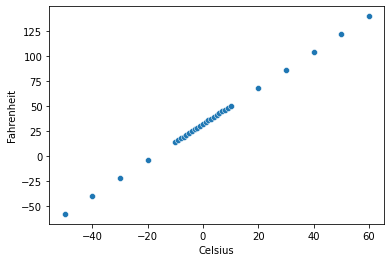

In [11]:
sns.scatterplot(x = temp_df["Celsius"], y = temp_df["Fahrenheit"])

In [4]:
X_train = temp_df["Celsius"]
y_train = temp_df["Fahrenheit"]

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [20]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.5),
              loss = "mean_squared_error")

In [28]:
epochs_hist = model.fit(X_train,y_train,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 277ms/step - loss: 1.6589
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 124.9377
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 8.6807
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 25.8006
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 70.6356
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 53.8432
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 15.9954
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 1.0905
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 15.9346
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 33.9297
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 32.5853
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 16.1844
Epoch 13/500
1/1 [=============================

In [ ]:
#epochs_hist.history['loss']
help(epochs_hist)


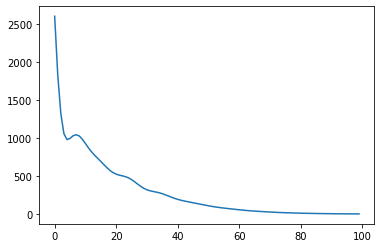

In [15]:
plt.plot(epochs_hist.history['loss'])

In [23]:
# get the weights of the regresion
model.get_weights()

[array([[1.7989545]], dtype=float32), array([30.714334], dtype=float32)]

In [29]:
Temp_C = 100
Temp_F = model.predict([Temp_C])

print("Temperature in DegF Using Trained ANN = ", Temp_F)

1/1 [==============================] - 0s 52ms/step
Temperature in DegF Using Trained ANN =  [[212.]]


In [30]:
# Confirm the equation
Temp_F = 9/5*Temp_C + 32

print("Temperature in DegF Using Equation = ", Temp_F)

Temperature in DegF Using Equation =  212.0
